## モデルの定義

### Sequentialモデル

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(16,)))
model.add(Dense(units=5, activation='softmax'))

In [17]:
import numpy as np
inputs = np.ones((1, 16), dtype=np.float32)
model(inputs)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.04192974, 0.7928109 , 0.07368534, 0.0224127 , 0.0691613 ]],
      dtype=float32)>

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(inputs.shape)
inputs

(1, 16)


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],
      dtype=float32)

In [9]:
sample = np.ones((16, 2), dtype=np.float32)
sample

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)

### Functional API

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [14]:
x = Input(shape=(16,))
h = Dense(units=32, activation='relu')(x)
y = Dense(units=5, activation='softmax')(h)
model = Model(inputs=[x], outputs=[y])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


### compile
- loss: 損失関数
- optimizer: 最適化関数
- metrics: 評価関数

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Callback
- 関数の引数に渡される関数
- 学習中のバッチやエポックの開始/終了時にメソッドを呼び出すことができる
- よく使われるコールバック
    - ModelCheckpoint
        - 学習中にモデルを保存する
    - EarlyStopping
        - 過学習を避ける
        - 一定のエポック数、学習に改善がなかった場合に、学習を停止する
        - patience: エポック数を指定する、ここで指定したエポック数を超えて指標に改善が見れない場合に学習を停止する
    - TensorBoard: これよく使うのか？
        - 可視化ツール

In [ ]:
ModelCheckpoint(filepath,
               monitor='val_loss',
               verbose=0,
               save_best_only=False,
               save_weights_only=False,
               mode='auto',
               period=1)

In [ ]:
EarlyStopping(monitor='val_loss',
             min_delta=0,
             patience=0,
             verbose=0,
             mode='auto',
             baseline=None,
             restore_best_weights=False)

In [ ]:
TensorBoard(log_dir='./log',
            histogram_freq=0,
            batch_size=32,
            write_graph=True,
            write_grads=False,
            write_images=False,
            embeddings_freq=0,
            embeddings_layer_names=None,
            embeddings_metadata=None,
            embeddings_data=None,
            update_freq='epoch')

In [20]:
import math
from tensorflow.keras.utils import Sequence

class Generator(Sequence):
    def __init__(self, x, y, batch_size=32):
        self.x = x
        self.y = y
        self.batch_size = batch_size
        
    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size: (idx + 1) * self.batch_size]
        return batch_x, batch_t
    
    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

### モデルの保存とロード
- 重みとアーキテクチャをまとめて保存
- 重みとアーキテクチャを別々に保存
    - to_json, to_yamlメソッドで文字列として書き出して、それを保存する

#### モデルを保存

In [ ]:
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [ ]:
json_string = model.to_json()
with open('architecture.json', 'w') as f:
    f.write(json_string)

#### 重みを保存

In [ ]:
model.save_weights('weights.h5')

In [ ]:
from tensorflow.keras.models import model_from_json

with open('architecture.json', 'r') as f:
    json_string = f.read()
    model = model_from_json(json_string)

#### モデルをロード

In [ ]:
model.load_weights('weights.h5')

### 学習

In [21]:
import sys

sys.path.append('../src/')

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from model import create_model
from preprocessing import clean_html, tokenize
from utils import load_dataset, plot_history

Epoch 1/100
200/200 [==============================] - 4s 17ms/step - loss: 0.5942 - accuracy: 0.7008 - val_loss: 0.4534 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 3s 13ms/step - loss: 0.2625 - accuracy: 0.9172 - val_loss: 0.4400 - val_accuracy: 0.8344
Epoch 3/100
200/200 [==============================] - 2s 8ms/step - loss: 0.1366 - accuracy: 0.9709 - val_loss: 0.4490 - val_accuracy: 0.8356
Epoch 4/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0718 - accuracy: 0.9887 - val_loss: 0.4838 - val_accuracy: 0.8325
Epoch 5/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0446 - accuracy: 0.9952 - val_loss: 0.5964 - val_accuracy: 0.8119
[[0.31653327 0.68346673]]


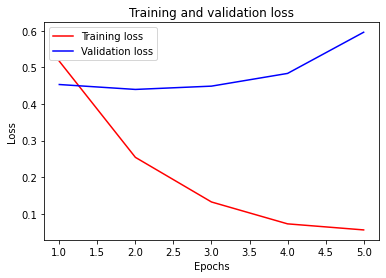

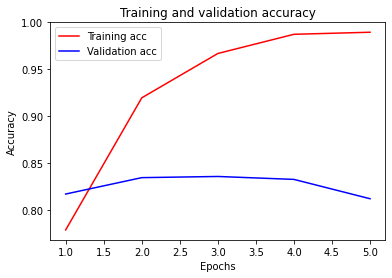

In [26]:
# データセットの読み込み
x, y = load_dataset('../data/amazon_reviews_multilingual_JP_v1_00.tsv', n=5000)

# データセットの前処理
x = [clean_html(text, strip=True) for text in x]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# データセットのベクトル化
vectorizer = CountVectorizer(tokenizer=tokenize)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
x_train = x_train.toarrayrray()
x_test = x_test.toarray()

# ハイパーパラメータの設定
vocab_size = len(vectorizer.vocabulary_)
label_size = len(set(y_train))

# モデルの構築
model = create_model(vocab_size, label_size)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# コールバックの準備
filepath = '../data/model.h5'
callback = [
    EarlyStopping(patience=3),
    ModelCheckpoint(filepath, save_best_only=True),
    TensorBoard(log_dir='../logs')
]

# モデルの学習
history = model.fit(x_train, y_train,
                   validation_split=0.2,
                   epochs=100,
                   batch_size=32,
                   callbacks=callback)

# モデルのロード
model = load_model(filepath)

# 予測
text = 'このアプリ超最高！'
vec = vectorizer.transform([text])
y_pred = model.predict(vec.toarray())
print(y_pred)

# 正解率を損失の可視化
plot_history(history)